In [56]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mic and gene classification model visuals

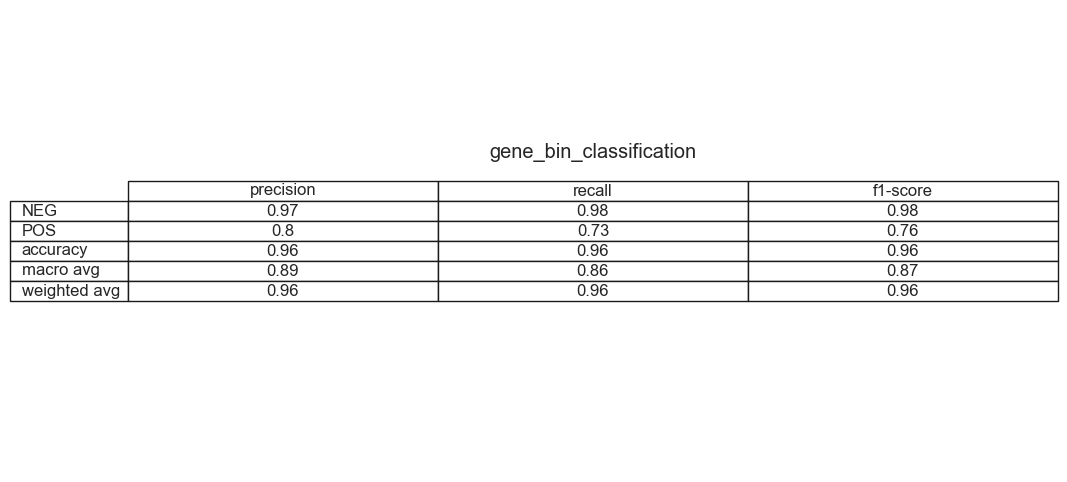

Classification report table saved to ./figures_and_visuals/gene_bin_classification_best_classification_report_table.png


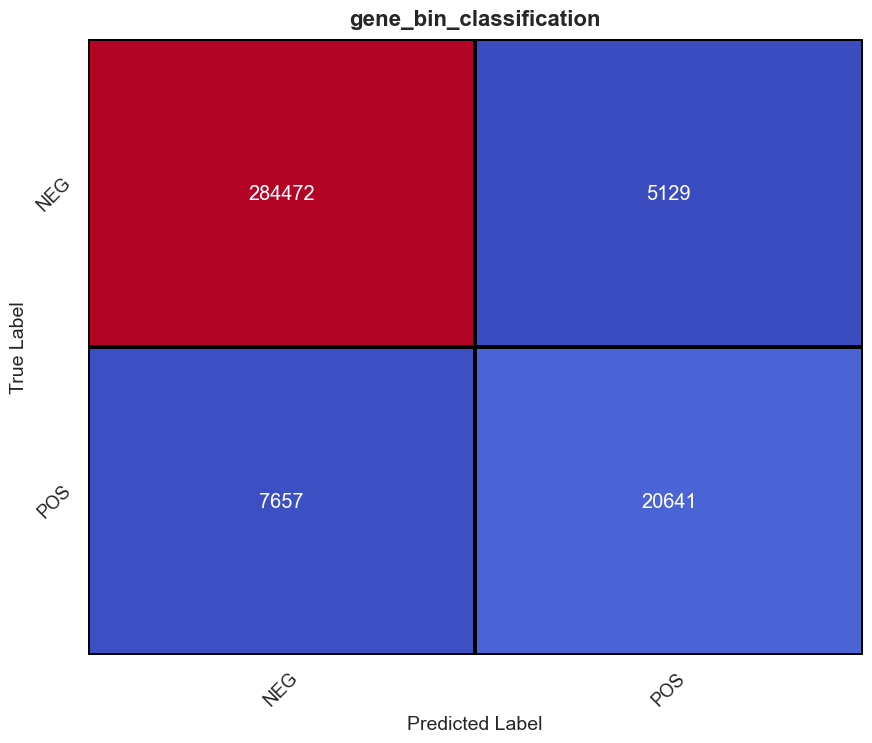

Confusion matrix saved to ./figures_and_visuals/gene_bin_classification_best_confusion_matrix.png


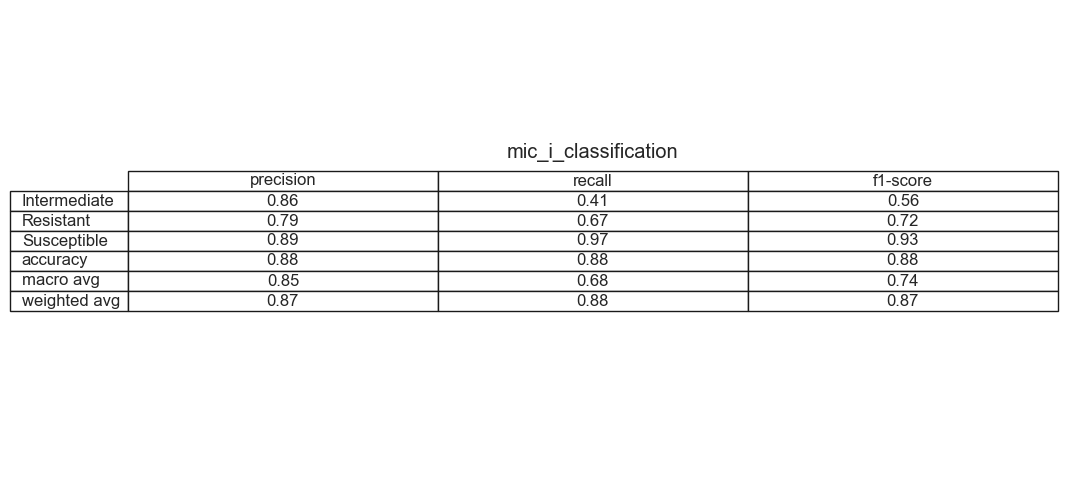

Classification report table saved to ./figures_and_visuals/mic_i_classification_metrics_classification_report_table.png


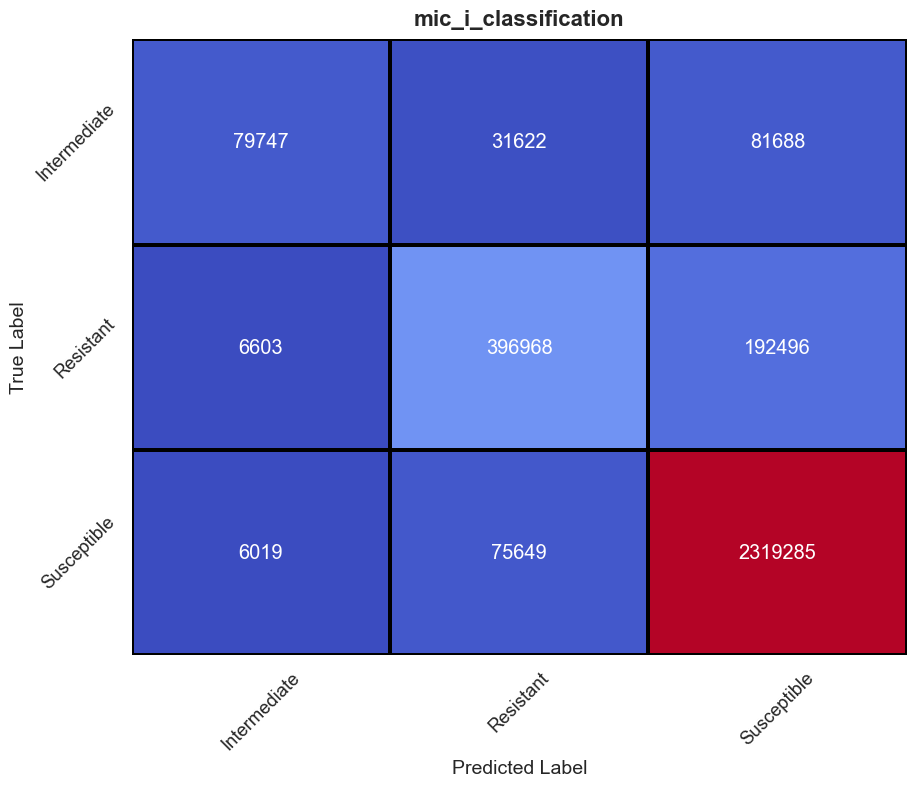

Confusion matrix saved to ./figures_and_visuals/mic_i_classification_metrics_confusion_matrix.png


In [57]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_evaluation_metrics(filename):
    """Load the evaluation metrics from a JSON file."""
    with open(filename) as file:
        data = json.load(file)
    return data

def save_classification_report(report_df, output_dir, base_name, title):
    """Save the classification report as a styled table image."""
    # Create the table figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Set the title for the table, adjust y to move it closer
    ax.set_title(title, pad=10, y=0.65)

    # Create the table
    table = ax.table(cellText=report_df.values,
                     colLabels=report_df.columns,
                     rowLabels=report_df.index,
                     cellLoc='center',
                     loc='center')

    # Apply formatting
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # Save the figure as an image file with the base name prepended
    output_path = os.path.join(output_dir, f'{base_name}_classification_report_table.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()

    print(f"Classification report table saved to {output_path}")

def save_confusion_matrix(confusion_matrix, labels, output_dir, base_name, title):
    """Save the confusion matrix as a heatmap image."""
    # Create a DataFrame for the confusion matrix
    confusion_df = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

    # Plot the confusion matrix with enhanced styling
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=1.5, linecolor='black')

    # Set the title for the confusion matrix
    plt.title(title, fontsize=16, fontweight='bold', pad=10)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    # Save the confusion matrix figure with the base name prepended
    output_path = os.path.join(output_dir, f'{base_name}_confusion_matrix.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()

    print(f"Confusion matrix saved to {output_path}")

def main(filename, output_dir='./figures_and_visuals', title=""):
    """Main function to load data, generate, and save plots."""
    # Extract the base name of the file (without extension)
    base_name = os.path.splitext(os.path.basename(filename))[0]

    # Load the evaluation metrics
    data = load_evaluation_metrics(filename)

    # Extract accuracy, classification report, and confusion matrix
    accuracy = data['accuracy']
    classification_report = data['classification_report']
    confusion_matrix = data['confusion_matrix']

    # Convert classification report to DataFrame and round to 2 decimal places
    report_df = pd.DataFrame(classification_report).T.round(2)
    # Drop 'support' column
    report_df.drop(columns='support', inplace=True)

    # Extract labels from the classification report keys
    labels = list(classification_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

    # Save the classification report table with a title
    save_classification_report(report_df, output_dir, base_name, title=title)

    # Save the confusion matrix heatmap with a title
    save_confusion_matrix(confusion_matrix, labels, output_dir, base_name, title=title)

# Example usage
main("./evaluation_metrics/gene_bin_classification_best.json", output_dir='./figures_and_visuals', title="gene_bin_classification")
main("./evaluation_metrics/mic_i_classification_metrics.json", output_dir='./figures_and_visuals', title="mic_i_classification")

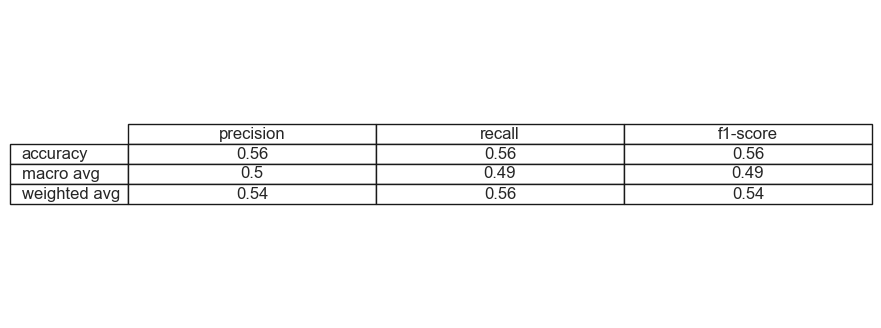

Aggregate metrics table saved to figures_and_visuals/mic_classification_metrics_aggregate_metrics_table.png


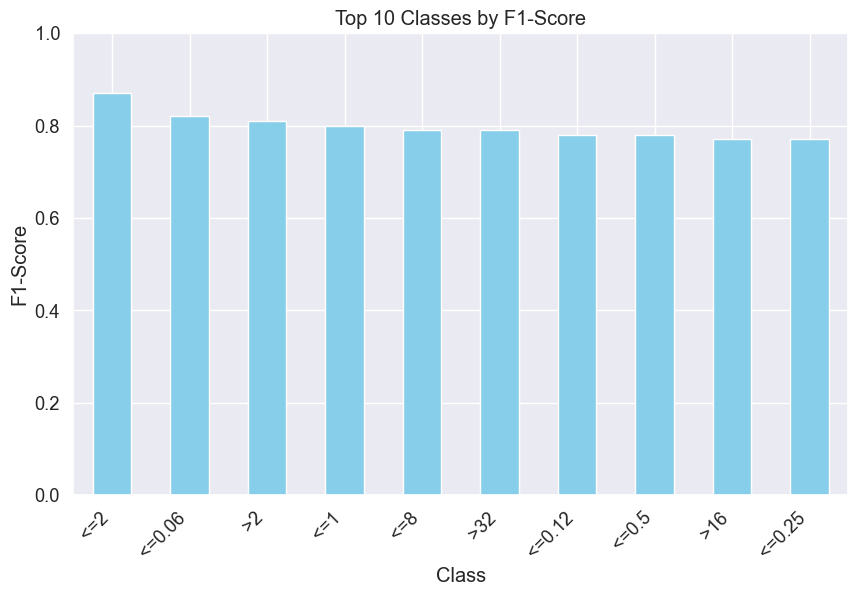

Top 10 F1-score bar chart saved to figures_and_visuals/mic_classification_metrics_top_10_f1_score_barchart.png


In [58]:
def load_evaluation_metrics(filename):
    """Load the evaluation metrics from a JSON file."""
    with open(filename) as file:
        data = json.load(file)
    return data

def save_aggregate_metrics_table(report_df, accuracy, output_dir, base_name):
    """Save a table for accuracy, macro-average, and weighted-average scores."""
    # Extract the relevant rows
    aggregate_df = report_df.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
    
    # Add the accuracy to the table
    accuracy_df = pd.DataFrame({'precision': [accuracy], 'recall': [accuracy], 'f1-score': [accuracy]}, index=['accuracy'])
    accuracy_df = accuracy_df.round(2)
    
    # Concatenate the accuracy row with the aggregate metrics
    final_df = pd.concat([accuracy_df, aggregate_df])

    # Create the table figure
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('off')

    # Create the table
    table = ax.table(cellText=final_df.values,
                     colLabels=final_df.columns,
                     rowLabels=final_df.index,
                     cellLoc='center',
                     loc='center')

    # Apply formatting
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # Save the figure as an image file with the base name prepended
    output_path = os.path.join(output_dir, f'{base_name}_aggregate_metrics_table.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()

    print(f"Aggregate metrics table saved to {output_path}")

def save_top_n_f1_score_bar_chart(report_df, top_n, output_dir, base_name):
    """Save a bar chart for the top N classes by F1-score."""
    # Sort the DataFrame by F1-score and select the top N classes
    top_n_f1 = report_df.sort_values(by='f1-score', ascending=False).head(top_n)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    top_n_f1['f1-score'].plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Classes by F1-Score')
    plt.xlabel('Class')
    plt.ylabel('F1-Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha="right")

    # Save the bar chart as an image file with the base name prepended
    output_path = os.path.join(output_dir, f'{base_name}_top_{top_n}_f1_score_barchart.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()

    print(f"Top {top_n} F1-score bar chart saved to {output_path}")

def save_top_n_f1_score_bar_chart(report_df, top_n, output_dir, base_name):
    """Save a bar chart for the top N classes by F1-score."""
    # Sort the DataFrame by F1-score and select the top N classes
    top_n_f1 = report_df.sort_values(by='f1-score', ascending=False).head(top_n)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    top_n_f1['f1-score'].plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Classes by F1-Score')
    plt.xlabel('Class')
    plt.ylabel('F1-Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha="right")

    # Save the bar chart as an image file with the base name prepended
    output_path = os.path.join(output_dir, f'{base_name}_top_{top_n}_f1_score_barchart.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()

    print(f"Top {top_n} F1-score bar chart saved to {output_path}")

def process_file(filename, output_dir='./visualizations', top_n=10):
    """Process a single JSON file to generate tables."""
    # Extract the base name of the file (without extension)
    base_name = os.path.splitext(os.path.basename(filename))[0]

    # Load the evaluation metrics
    data = load_evaluation_metrics(filename)

    # Extract accuracy and classification report
    accuracy = data['accuracy']
    classification_report = data['classification_report']

    # Convert classification report to DataFrame and round to 2 decimal places
    report_df = pd.DataFrame(classification_report).T.round(2)

    # Save the aggregate metrics table
    save_aggregate_metrics_table(report_df, accuracy, output_dir, base_name)

    # Save the top N F1-score bar chart
    save_top_n_f1_score_bar_chart(report_df, top_n, output_dir, base_name)


process_file("/Users/thomaslim/microbis/evaluation_metrics/mic_classification_metrics.json", output_dir="figures_and_visuals", top_n=10)

Bacterial identification models

                           Accuracy  Precision  Recall  F1-Score
rf_8_panel_enterobac_100       0.31       0.25    0.31      0.24
rf_20_panel_enterobac_100      0.79       0.81    0.79      0.78


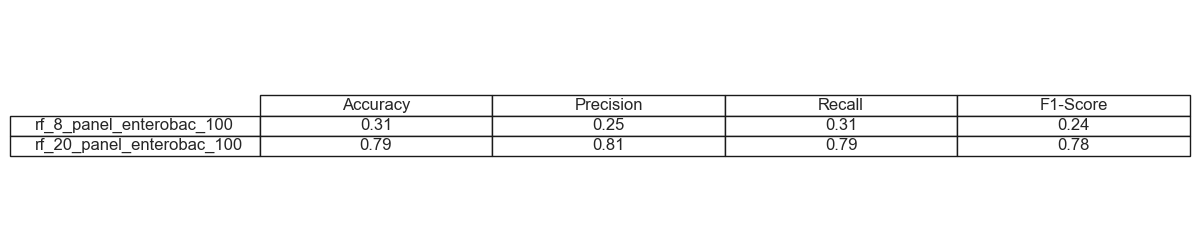

Model comparison table saved to ./figures_and_visuals/bac_models_comparison_table.png


In [61]:
import pandas as pd
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate the model and return the metrics
def evaluate_model(model_path, test_set_path):
    # Load the model
    with open(model_path, 'rb') as file:
        model = load(file)

    # Load the test set
    test_set = pd.read_csv(test_set_path)
    X_test = test_set.drop('Target', axis=1)
    y_test = test_set['Target']

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Define the model paths and test set paths
models = {
    'rf_8_panel_enterobac_100': ('./models/rf_8_panel_enterobac_100.pkl', './test_sets/rf_8_panel_enterobac_100_test_set.csv'),
    'rf_20_panel_enterobac_100': ('./models/rf_20_panel_enterobac_100.pkl', './test_sets/rf_20_panel_enterobac_100_test_set.csv')
}

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each model and store the results
for model_name, (model_path, test_set_path) in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model_path, test_set_path)
    results_df.loc[model_name] = [accuracy, precision, recall, f1]

# Round the results to 2 decimal places
results_df = results_df.round(2)

# Display the results
print(results_df)

# Plot the results as a table
plt.figure(figsize=(10, 3))
plt.axis('off')

# Create the table
table = plt.table(cellText=results_df.values,
                  colLabels=results_df.columns,
                  rowLabels=results_df.index,
                  cellLoc='center',
                  loc='center')

# Apply formatting
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the table as a PNG image
output_path = './figures_and_visuals/bac_models_comparison_table.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
plt.show()

print(f"Model comparison table saved to {output_path}")

Feature importance figures

bac models feature importance figures

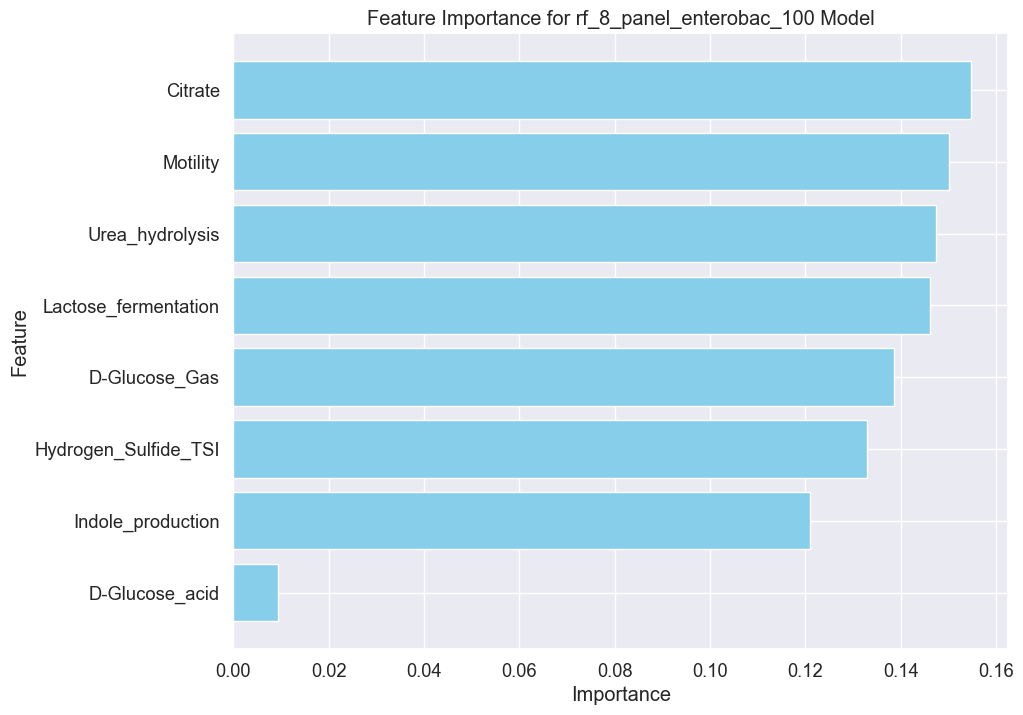

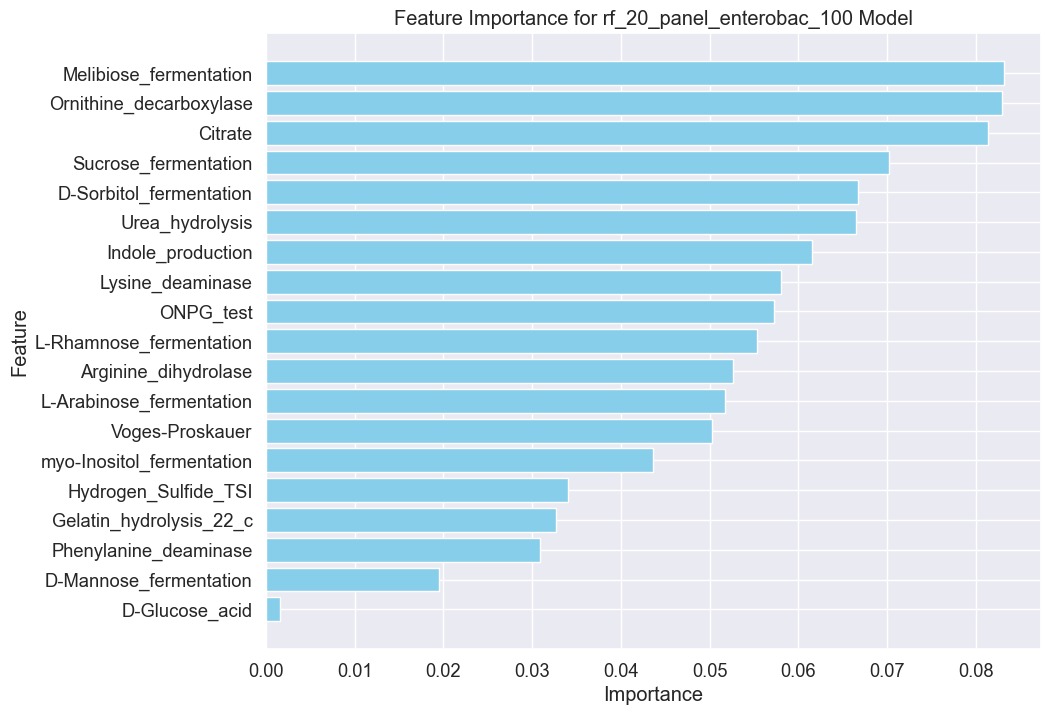

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load

def plot_feature_importance(model_path, test_set_path, output_path, title):
    # Load the model
    with open(model_path, 'rb') as file:
        model = load(file)

    # Load the test set to get feature names
    test_set = pd.read_csv(test_set_path)
    X_test = test_set.drop('Target', axis=1)
    features = X_test.columns

    # Get feature importances
    importances = model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    
    # Save the figure before showing it
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    
    # Display the plot
    plt.show()

def main():
    plot_feature_importance('./models/rf_8_panel_enterobac_100.pkl', 
                            './test_sets/rf_8_panel_enterobac_100_test_set.csv', 
                            './figures_and_visuals/bac_models/bac_8_panel_model_feature_importance.png', 
                            'Feature Importance for rf_8_panel_enterobac_100 Model')
    plot_feature_importance('./models/rf_20_panel_enterobac_100.pkl', 
                            './test_sets/rf_20_panel_enterobac_100_test_set.csv', 
                            './figures_and_visuals/bac_models/bac_20_panel_model_feature_importance.png', 
                            'Feature Importance for rf_20_panel_enterobac_100 Model')
main()

mic and gene models feature importances

/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:363: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src

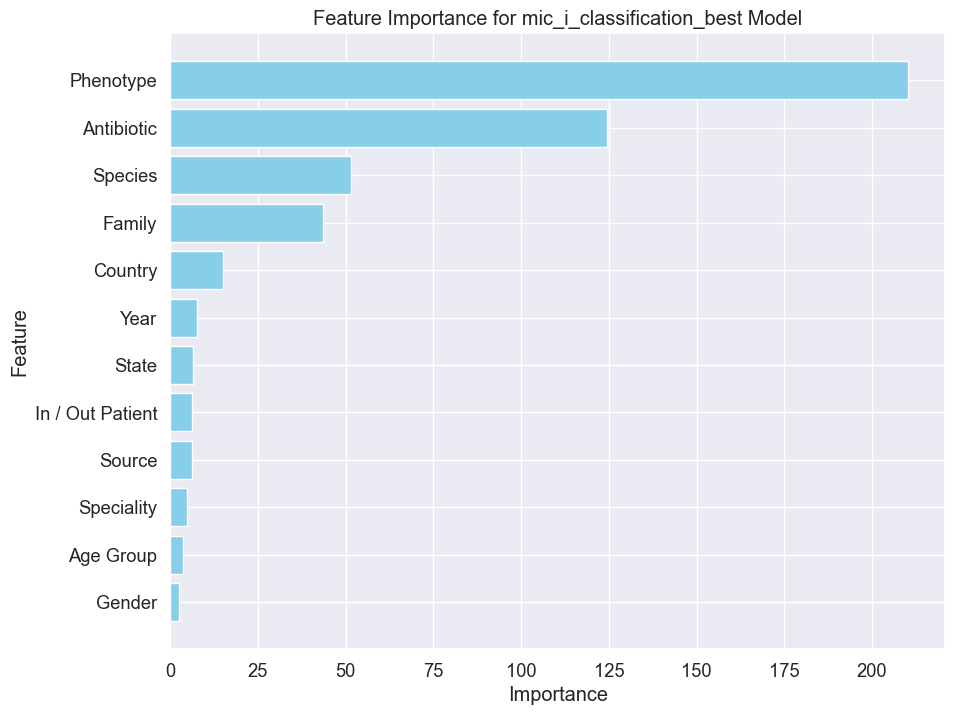

/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:25] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:363: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:25] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:25] WARNING: /Users/runner/work/xgboost/xgboost/src

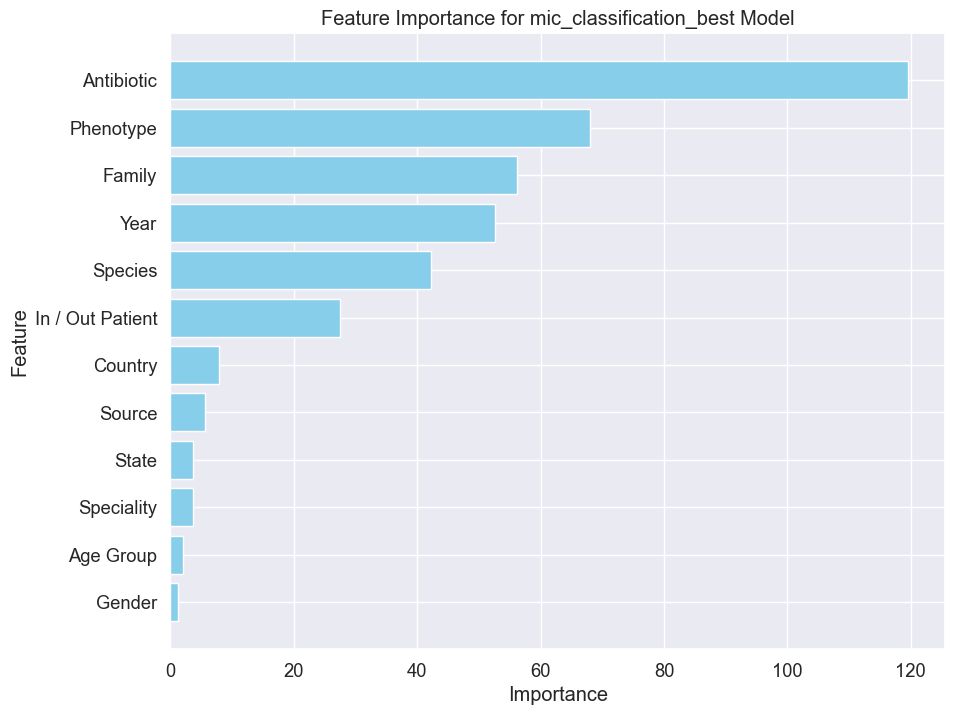

/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:30] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:363: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:30] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:30] WARNING: /Users/runner/work/xgboost/xgboost/src

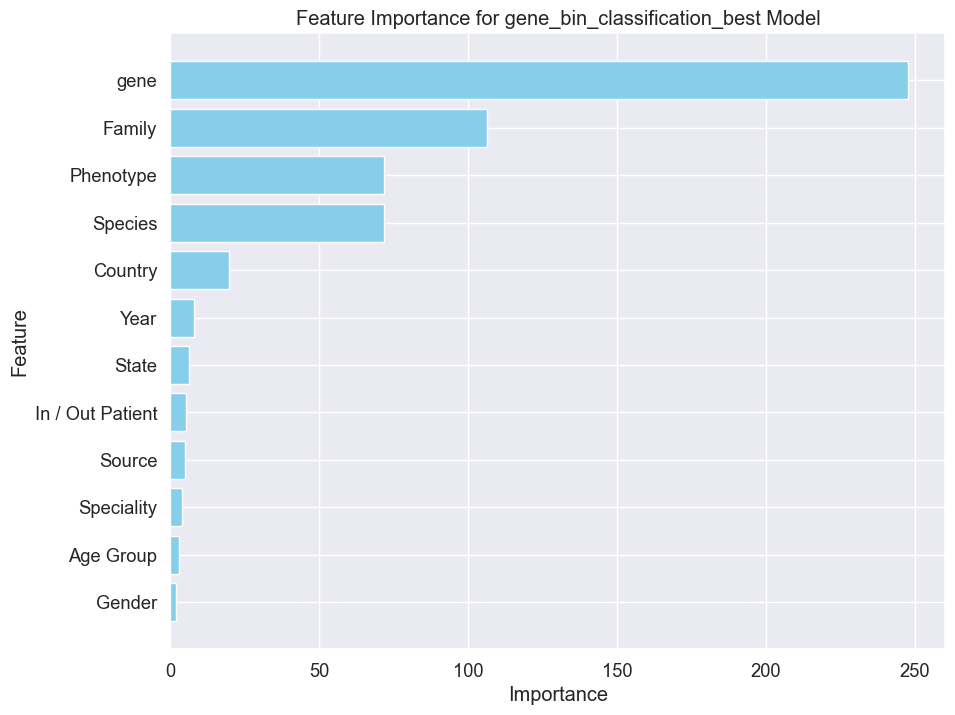

/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:31] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:363: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:31] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/Users/thomaslim/miniconda3/envs/microbis/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:58:31] WARNING: /Users/runner/work/xgboost/xgboost/src

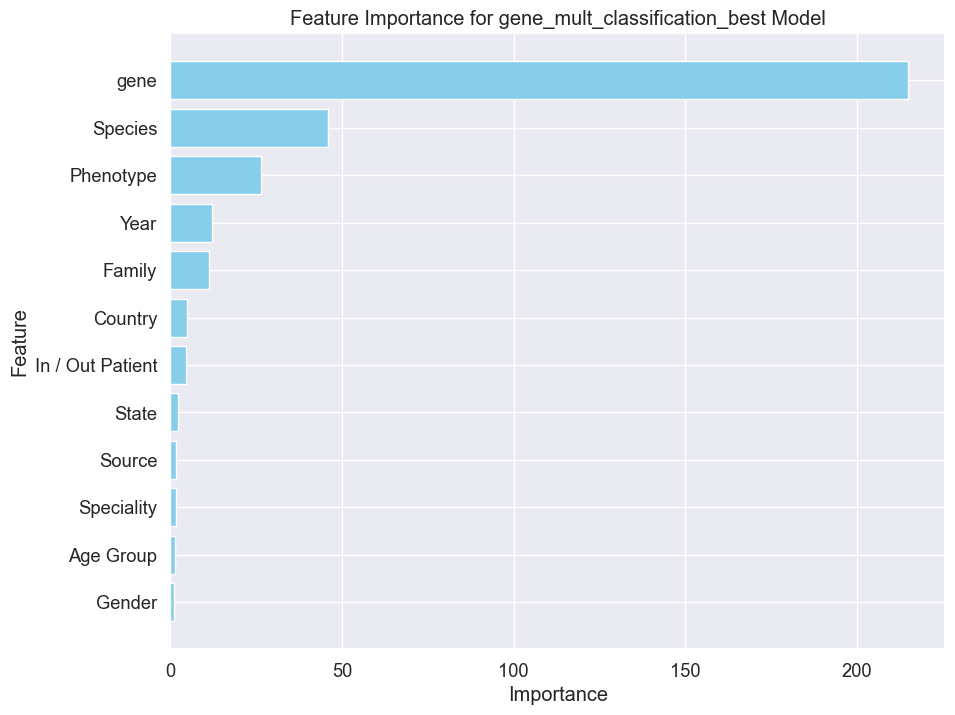

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
import pickle

def plot_xgb_feature_importance(model_path, test_set_path, output_path, title, target, importance_type='gain'):
    # Load the model and label encoder from the pickle file
    with open(model_path, 'rb') as file:
        model_and_encoder = pickle.load(file)
    
    # Access the XGBoost model
    model = model_and_encoder['model']

    # Load the test set to get feature names
    test_set = pd.read_csv(test_set_path)
    X_test = test_set.drop(target, axis=1)
    features = X_test.columns

    # Get feature importances using the specified importance_type
    importances = model.get_booster().get_score(importance_type=importance_type)

    # Convert to DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': [importances.get(f, 0) for f in features]
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    
    # Save the figure before showing it
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.02)
    
    # Display the plot
    plt.show()

def main():
    plot_xgb_feature_importance(model_path = './models/mic_i_classification_best.pkl', 
                                test_set_path = './test_sets/MIC_Interpretation_test_set.csv', 
                                output_path = './figures_and_visuals/mic_models/mic_i_model_feature_importance.png', 
                                title = 'Feature Importance for mic_i_classification_best Model',
                                target='MIC_Interpretation')
    plot_xgb_feature_importance(model_path = './models/mic_classification_best.pkl', 
                                test_set_path = './test_sets/MIC_test_set.csv', 
                                output_path = './figures_and_visuals/mic_models/mic_model_feature_importance.png', 
                                title = 'Feature Importance for mic_classification_best Model',
                                target='MIC')
    plot_xgb_feature_importance(model_path = './models/gene_bin_classification_best.pkl', 
                                test_set_path = './test_sets/gene_bin_test_set.csv', 
                                output_path = './figures_and_visuals/gene_models/gene_bin_model_feature_importance.png', 
                                title = 'Feature Importance for gene_bin_classification_best Model',
                                target='detected_binary')
    plot_xgb_feature_importance(model_path = './models/gene_mult_classification_best.pkl', 
                                test_set_path = './test_sets/gene_mult_test_set.csv', 
                                output_path = './figures_and_visuals/gene_models/gene_mult_model_feature_importance.png', 
                                title = 'Feature Importance for gene_mult_classification_best Model',
                                target='detected_variant')
    
main()

gene models feature importances